### Customer Personality Analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

It helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Aim

Our main objective is to gain insights into the personality traits and buying behavior of customers, and use this information to make data-driven business decisions

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
%matplotlib inline
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
Data  = pd.read_csv('marketing_campaign.csv',sep="\t")
Data.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### Basic Exploration]

In [3]:
#CREATING A COPY OF THE RAW DATASET....
df = Data.copy()

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.describe() #summary

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Data Cleaning

In [8]:
# checking duplicates
df.duplicated().sum()

0

In [9]:
# checking null values if any
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# droping missing values 
df = df.dropna()

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Data Transformation

In [12]:
df["Year_Birth"].value_counts()

1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

In [13]:
df['Cust_Age'] = 2023 - df['Year_Birth']

In [14]:
df['Cust_Age'].unique() # outliers need to be handel

array([ 66,  69,  58,  39,  42,  56,  52,  38,  49,  73,  47,  64,  71,
        36,  77,  43,  74,  41,  44,  72,  54,  34,  60,  53,  50,  80,
        48,  27,  55,  59,  46,  45,  68,  57,  35,  75,  65,  51,  63,
        40,  78,  32,  61,  70,  67,  31,  62, 123,  37, 130,  33,  76,
       124,  30,  29,  82,  79,  28,  83], dtype=int64)

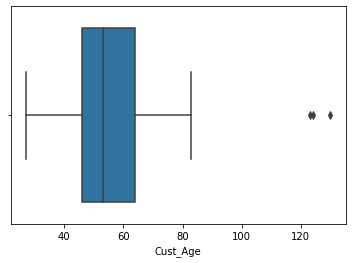

In [15]:
ax = sns.boxplot(df['Cust_Age'])# checking outliers
plt.show()

In [16]:
Q1 = np.percentile(df['Cust_Age'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['Cust_Age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR
print('low_limit is', low_lim1)
print('up_limit is', up_lim1)
outlier1 =[]
for x in df['Cust_Age']:
    if ((x> up_lim1) or (x<low_lim1)):
         outlier1.append(x)
print(' outlier in the dataset is', outlier1)
print(len(outlier1))

Interquartile range is 18.0
low_limit is 19.0
up_limit is 91.0
 outlier in the dataset is [123, 130, 124]
3


In [17]:
#caping outliers from age column
df1 = df[df['Cust_Age']<91]

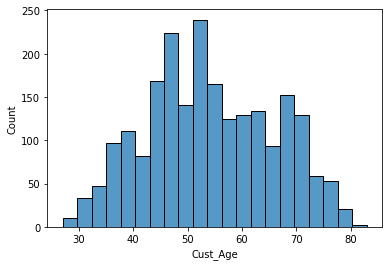

In [18]:
sns.histplot(df1.Cust_Age)
plt.show()

In [19]:
# checking uniqueness for education values
df1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [20]:
# creating CATEGORY IN "UG" AND "PG" ONLY....
df1['Education']=df1['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate',
                           'Graduation':'Graduate','Master':'Postgraduate',
                           'PhD':'Postgraduate'})

In [21]:
df1['Education'].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [22]:
df1['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
df1['Marital_Status'] = df1['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone',
                                                        'Married':'relationship','Together':'relationship',
                                                        'Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [24]:
df1['Marital_Status'].unique()

array(['Alone', 'relationship'], dtype=object)

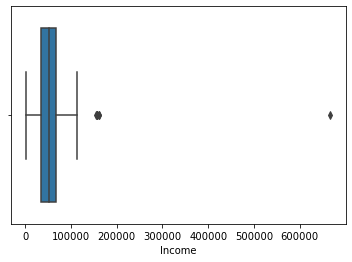

In [25]:
ax = sns.boxplot(df['Income'])
plt.show()

In [26]:
Q1 = np.percentile(df1['Income'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df1['Income'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim1 = Q1 - 1.5 * IQR
up_lim1 = Q3 + 1.5 * IQR
print('low_limit is', low_lim1)
print('up_limit is', up_lim1)
outlier1 =[]
for x in df1['Income']:
    if ((x> up_lim1) or (x<low_lim1)):
         outlier1.append(x)
print(' outlier in the dataset is', outlier1)
print(len(outlier1))

Interquartile range is 33241.0
low_limit is -14615.5
up_limit is 118348.5
 outlier in the dataset is [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]
8


In [27]:
#removing outliers from age column
df1 = df1[df1['Income']<118348.5]

In [28]:
df1 = df1.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store','NumWebVisitsMonth': 'visits'})

In [29]:
#Feature indicating total children living in the household
df1["Children"]=df1["Kidhome"]+ df1["Teenhome"]

In [30]:
df1['Expenses'] = df1['MntWines'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

In [31]:
df1 = df1.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [32]:
#ADDING A COLUMN "Age" IN THE DATAFRAME....
df1['cust_from'] = (pd.Timestamp('now').year) - (pd.to_datetime(df1['Dt_Customer']).dt.year)

In [33]:
# create bins for recency
bins = [0, 30, 60, 90, 120, 150, 180]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180']
df1['Recency_bin'] = pd.cut(df1['Recency'], bins=bins, labels=labels)

In [34]:
df1['TotalAcceptedCmp'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5']

In [35]:
df1['TotalAcceptedCmp'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [36]:
def age(x):
    if x <= 19:
        return 'Teens'
    elif x >20 and x<=39:
        return 'Adults'
    elif x>40 and x<=59:
        return 'Mature'
    else:
        return 'Seniors'

In [37]:
df1['Age'] = df1["Cust_Age"].apply(age)

In [38]:
df1.head(5)

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate          Alone  58138.0        0         0   
1  2174        1954      Graduate          Alone  46344.0        1         1   
2  4141        1965      Graduate   relationship  71613.0        0         0   
3  6182        1984      Graduate   relationship  26646.0        1         0   
4  5324        1981  Postgraduate   relationship  58293.0        1         0   

  Dt_Customer  Recency  Wines  ...  Z_CostContact  Z_Revenue  Response  \
0  04-09-2012       58    635  ...              3         11         1   
1  08-03-2014       38     11  ...              3         11         0   
2  21-08-2013       26    426  ...              3         11         0   
3  10-02-2014       26     11  ...              3         11         0   
4  19-01-2014       94    173  ...              3         11         0   

   Cust_Age  Children  Expenses  cust_from  Recency_bin  TotalAcceptedCmp  \
0        66         0      1617         11        31-60                 0   
1        69         2        27          9        31-60                 0   
2        58         0       776         10         0-30                 0   
3        39         1        53          9         0-30                 0   
4        42         1       422          9       91-120                 0   

       Age  
0  Seniors  
1  Seniors  
2   Mature  
3   Adults  
4   Mature  

[5 rows x 36 columns]

In [39]:
# taking only usefull columns
df2=df1[['Age','Education','Marital_Status','Income','Expenses','cust_from','Cust_Age', 'Recency','Recency_bin','Children','Wines','Fruits','Meat','Fish',
           'Sweets','Gold','TotalAcceptedCmp','Complain']]
df2.head()

Age     Education Marital_Status   Income  Expenses  cust_from  \
0  Seniors      Graduate          Alone  58138.0      1617         11   
1  Seniors      Graduate          Alone  46344.0        27          9   
2   Mature      Graduate   relationship  71613.0       776         10   
3   Adults      Graduate   relationship  26646.0        53          9   
4   Mature  Postgraduate   relationship  58293.0       422          9   

   Cust_Age  Recency Recency_bin  Children  Wines  Fruits  Meat  Fish  Sweets  \
0        66       58       31-60         0    635      88   546   172      88   
1        69       38       31-60         2     11       1     6     2       1   
2        58       26        0-30         0    426      49   127   111      21   
3        39       26        0-30         1     11       4    20    10       3   
4        42       94      91-120         1    173      43   118    46      27   

   Gold  TotalAcceptedCmp  Complain  
0    88                 0         0  
1     6                 0         0  
2    42                 0         0  
3     5                 0         0  
4    15                 0         0

In [40]:
df2.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Expenses', 'cust_from',
       'Cust_Age', 'Recency', 'Recency_bin', 'Children', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'TotalAcceptedCmp', 'Complain'],
      dtype='object')

### EDA

##### Univariate Analysis

Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

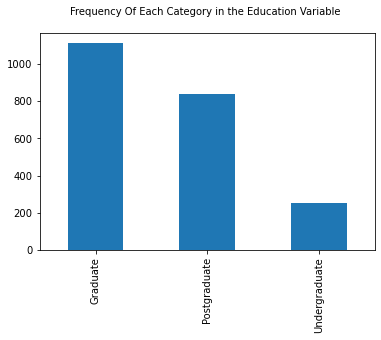

In [41]:
#VISUALIZING THE "Education"
df2['Education'].value_counts().plot(kind='bar')
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=10)

Text(0.5, 1.0, 'Frequency Of Each Category in the Education Variable \n')

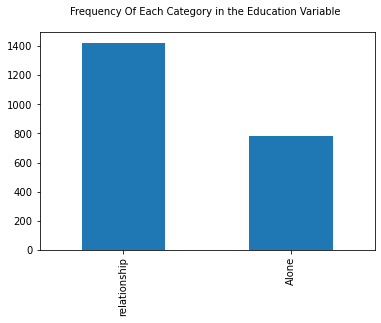

In [42]:
df2['Marital_Status'].value_counts().plot(kind='bar')
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=10)


Text(0.5, 1.0, 'Frequency Of Complain\n')

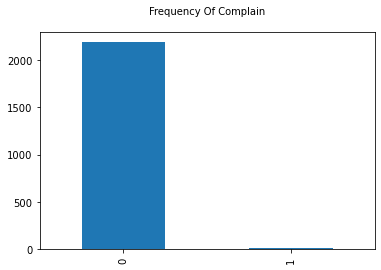

In [43]:
df2['Complain'].value_counts().plot(kind='bar',)
plt.title("Frequency Of Complain\n",fontsize=10)

Text(0.5, 1.0, 'Frequency Of Recency\n')

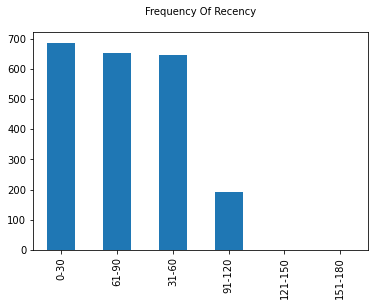

In [44]:
df2['Recency_bin'].value_counts().plot(kind='bar',)
plt.title("Frequency Of Recency\n",fontsize=10)

In [45]:
df2['TotalAcceptedCmp'].value_counts()

0    1747
1     322
2      81
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64

<Figure size 288x288 with 0 Axes>

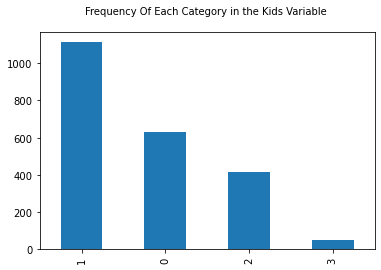

<Figure size 288x288 with 0 Axes>

In [46]:
#VISUALIZING THE "Kids"
df1['Children'].value_counts().plot(kind='bar')
plt.title("Frequency Of Each Category in the Kids Variable \n",fontsize=10)
plt.figure(figsize=(4,4))

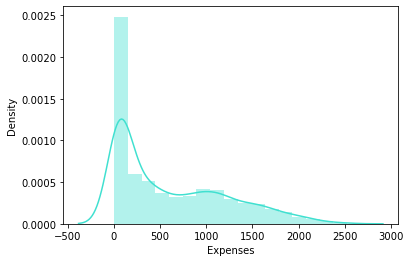

In [47]:
sns.distplot(df1["Expenses"],color = 'turquoise')
plt.show()

<AxesSubplot:>

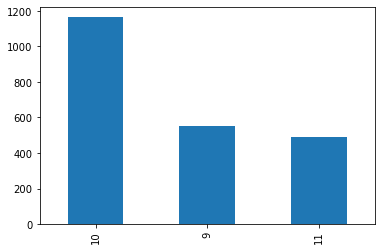

In [48]:
df2['cust_from'].value_counts().plot(kind='bar',)

Text(0.5, 1.0, 'Frequency Of Each Category in the Age Variable \n')

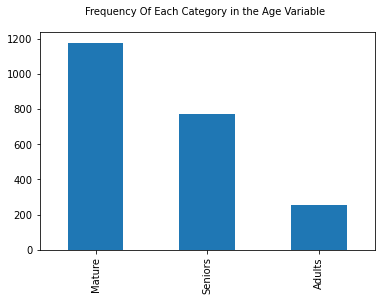

In [49]:
df2['Age'].value_counts().plot(kind='bar',)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=10)

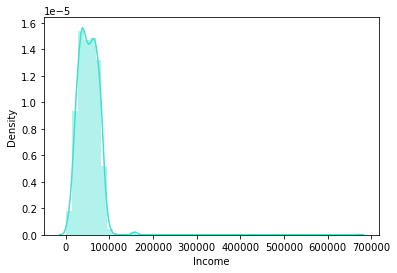

In [50]:
sns.distplot(df["Income"],color = 'turquoise')
plt.show()

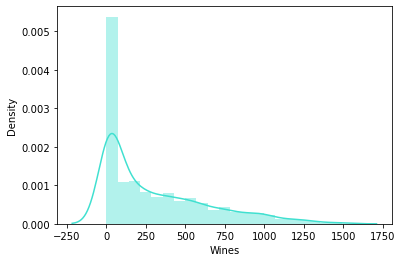

In [51]:
sns.distplot(df2["Wines"],color = 'turquoise')
plt.show()

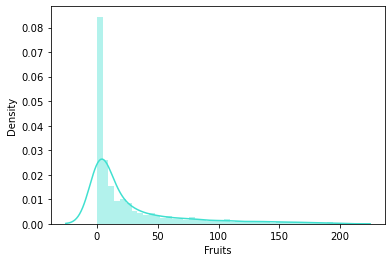

In [52]:
sns.distplot(df2["Fruits"],color = 'turquoise')
plt.show()

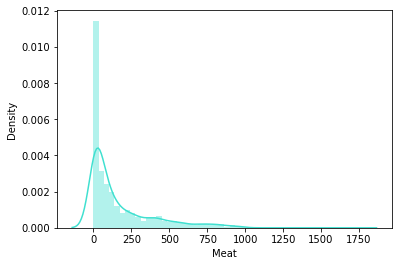

In [53]:
sns.distplot(df2["Meat"],color = 'turquoise')
plt.show()

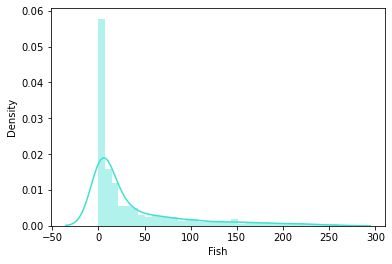

In [54]:
sns.distplot(df2["Fish"],color = 'turquoise')
plt.show()

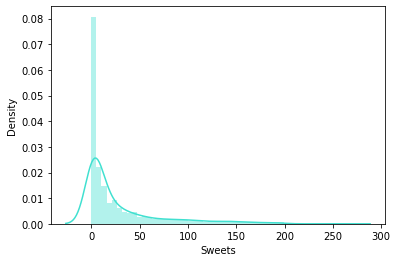

In [55]:
sns.distplot(df2["Sweets"],color = 'turquoise')
plt.show()

In [56]:
df2.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Expenses', 'cust_from',
       'Cust_Age', 'Recency', 'Recency_bin', 'Children', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'TotalAcceptedCmp', 'Complain'],
      dtype='object')

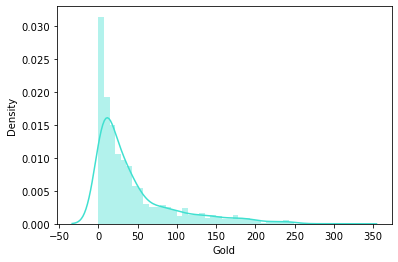

In [57]:
sns.distplot(df2["Gold"],color = 'turquoise')
plt.show()

### Bivariate and Multivariate Analysis

In [58]:
df2.head(2)

Age Education Marital_Status   Income  Expenses  cust_from  Cust_Age  \
0  Seniors  Graduate          Alone  58138.0      1617         11        66   
1  Seniors  Graduate          Alone  46344.0        27          9        69   

   Recency Recency_bin  Children  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0       58       31-60         0    635      88   546   172      88    88   
1       38       31-60         2     11       1     6     2       1     6   

   TotalAcceptedCmp  Complain  
0                 0         0  
1                 0         0

#### Demographic attributes¶

In [59]:
# analysis on Age,income,education,Marital_Status, Children

In [60]:
a = px.histogram(df2,x = 'Age', color = 'Marital_Status')
a.show()
b = px.histogram(df2,x = 'Age', color = 'Education')
b.show()
c = px.histogram(df2,x = 'Age', color = 'Children')
c.show()

### Behavioural

In [61]:
#To find the actions and patterns of customers when it comes to buying products or services,spending habits.

In [62]:
fig = px.scatter(df2, x="Income", y="Expenses",color = 'Age', width=800, height=400)
fig.show()
fig = px.scatter(df2, x="Income", y="Expenses",color = 'Children', width=800, height=400)
fig.show()

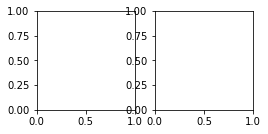

In [63]:
plt.subplot(2, 3, 1) # 2 rows, 3 columns, first plot
a = px.histogram(df2,x = 'Age',y = "Wines", color = 'Children')
a.show()
plt.subplot(2, 3, 2) # 2 rows, 3 columns, second plot
b = px.histogram(df2,x = 'Age',y = 'Fruits', color = 'Children')
b.show()
c = px.histogram(df2,x = 'Age',y = "Meat", color = 'Children')
c.show()
d = px.histogram(df2,x = 'Age',y = "Fish", color = 'Children')
d.show()
e = px.histogram(df2,x = 'Age',y = 'Sweets', color = 'Children')
e.show()
f = px.histogram(df2,x = 'Age',y = "Gold", color = 'Children')
f.show()

In [64]:
a = px.histogram(df2,x = 'Income',y = "Wines" ,color = 'Education')
a.show()
b = px.histogram(df2,x = 'Income',y = 'Fruits', color = 'Education')
b.show()
c = px.histogram(df2,x = 'Income',y = "Meat", color = 'Education')
c.show()
d = px.histogram(df2,x = 'Income',y = "Fish", color = 'Education')
d.show()
e = px.histogram(df2,x = 'Income',y = 'Sweets', color = 'Education')
e.show()
f = px.histogram(df2,x = 'Income',y = "Gold", color = 'Education')
f.show()

In [65]:
a = px.histogram(df2,x = 'Income',y = "Expenses" ,color = 'cust_from')
a.show()
b = px.histogram(df2,x = 'Recency_bin',y = 'Income', color = 'Education')
b.show()
c = px.histogram(df2,x = 'Income',y = "Recency_bin", color = 'cust_from')
c.show()
d = px.histogram(df2,x = 'TotalAcceptedCmp',y = "Income", color = 'Complain')
d.show()
e = px.histogram(df2,x = 'TotalAcceptedCmp',y = 'Expenses', color = 'Complain')
e.show()
e = px.histogram(df2,x = 'Marital_Status',y = 'TotalAcceptedCmp', color = 'Education')
e.show()

In [66]:
df2.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Expenses', 'cust_from',
       'Cust_Age', 'Recency', 'Recency_bin', 'Children', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'TotalAcceptedCmp', 'Complain'],
      dtype='object')

In [67]:
df2

Age     Education Marital_Status   Income  Expenses  cust_from  \
0     Seniors      Graduate          Alone  58138.0      1617         11   
1     Seniors      Graduate          Alone  46344.0        27          9   
2      Mature      Graduate   relationship  71613.0       776         10   
3      Adults      Graduate   relationship  26646.0        53          9   
4      Mature  Postgraduate   relationship  58293.0       422          9   
...       ...           ...            ...      ...       ...        ...   
2235   Mature      Graduate   relationship  61223.0      1341         10   
2236  Seniors  Postgraduate   relationship  64014.0       444          9   
2237   Mature      Graduate          Alone  56981.0      1241          9   
2238  Seniors  Postgraduate   relationship  69245.0       843          9   
2239  Seniors  Postgraduate   relationship  52869.0       172         11   

      Cust_Age  Recency Recency_bin  Children  Wines  Fruits  Meat  Fish  \
0           66       58       31-60         0    635      88   546   172   
1           69       38       31-60         2     11       1     6     2   
2           58       26        0-30         0    426      49   127   111   
3           39       26        0-30         1     11       4    20    10   
4           42       94      91-120         1    173      43   118    46   
...        ...      ...         ...       ...    ...     ...   ...   ...   
2235        56       46       31-60         1    709      43   182    42   
2236        77       56       31-60         3    406       0    30     0   
2237        42       91      91-120         0    908      48   217    32   
2238        67        8        0-30         1    428      30   214    80   
2239        69       40       31-60         2     84       3    61     2   

      Sweets  Gold  TotalAcceptedCmp  Complain  
0         88    88                 0         0  
1          1     6                 0         0  
2         21    42                 0         0  
3          3     5                 0         0  
4         27    15                 0         0  
...      ...   ...               ...       ...  
2235     118   247                 0         0  
2236       0     8                 1         0  
2237      12    24                 1         0  
2238      30    61                 0         0  
2239       1    21                 0         0  

[2205 rows x 18 columns]

### Encoding categorical columns

In [68]:
df2.Age.unique()

array(['Seniors', 'Mature', 'Adults'], dtype=object)

In [69]:
df2['Age'] = df2['Age'].map({'Adults':0,'Mature':1, 'Seniors':2})
     

In [70]:
df2.Age.unique()

array([2, 1, 0], dtype=int64)

In [71]:
df2.Education.unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [72]:
df2['Education'] = df2['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
     

In [73]:
df2.Education.unique()

array([1, 2, 0], dtype=int64)

In [74]:
df2.Marital_Status.unique()

array(['Alone', 'relationship'], dtype=object)

In [75]:
df2['Marital_Status'] = df2['Marital_Status'].map({'Alone':0,'relationship':1})
     

In [76]:
df2.Marital_Status.unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

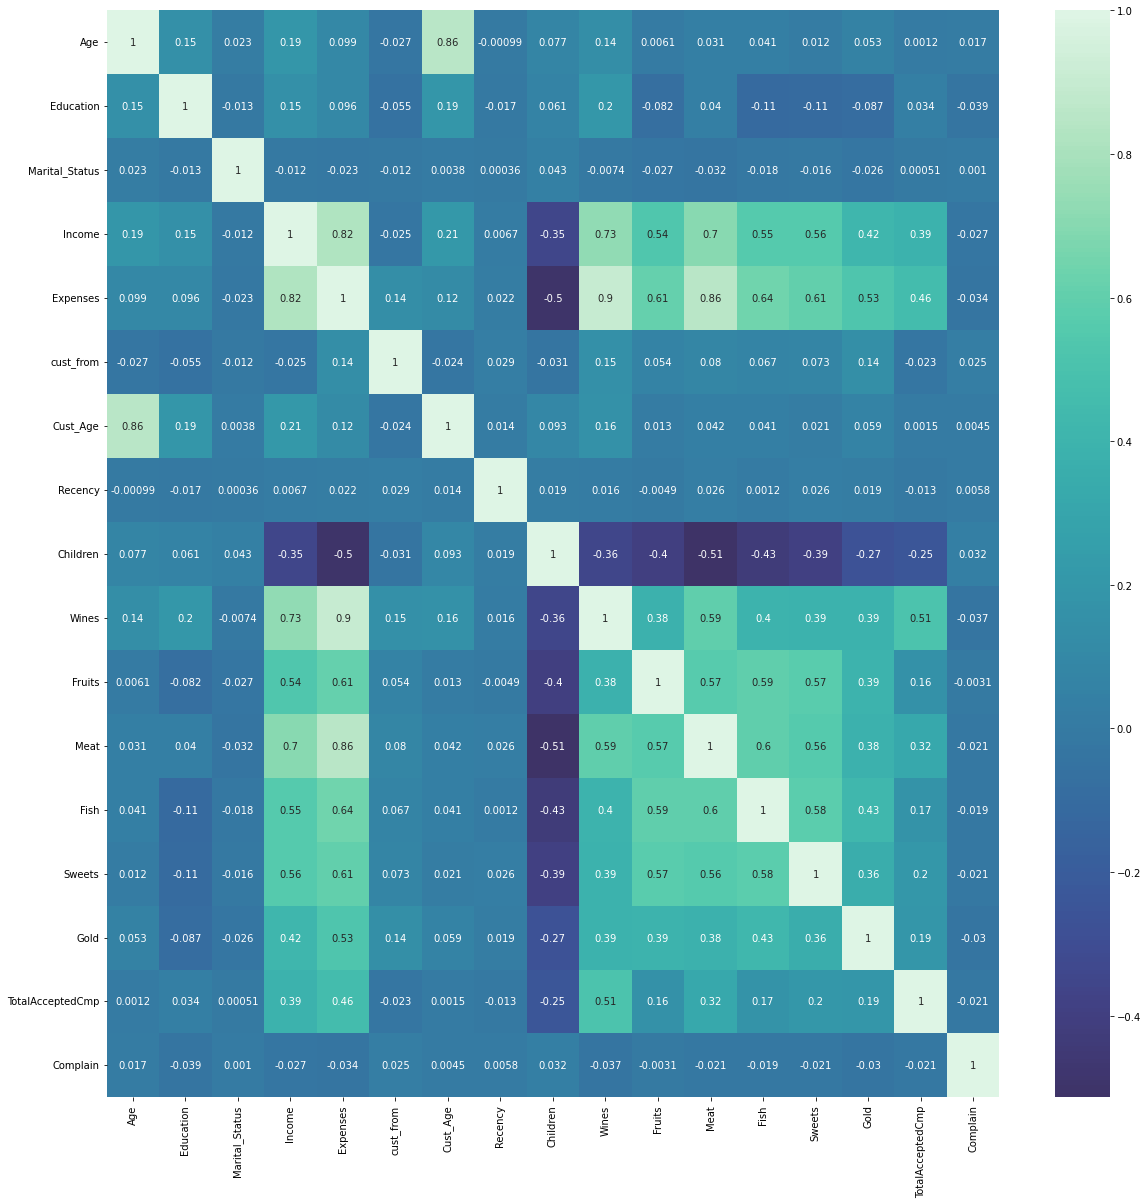

In [77]:
corrmat = df2.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

### Feature Scaling

In [78]:
# droping some columns
df3 = df2.drop(['Recency_bin','Complain'],axis = 1)

In [79]:
df3.head(2)

Age  Education  Marital_Status   Income  Expenses  cust_from  Cust_Age  \
0    2          1               0  58138.0      1617         11        66   
1    2          1               0  46344.0        27          9        69   

   Recency  Children  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0       58         0    635      88   546   172      88    88   
1       38         2     11       1     6     2       1     6   

   TotalAcceptedCmp  
0                 0  
1                 0

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
df4 = pd.DataFrame(scaler.fit_transform(df3), columns = df3.columns)

In [82]:
df4.head(5)

Age  Education  Marital_Status    Income  Expenses  cust_from  \
0  1.194958  -0.409469       -1.347625  0.314651  1.679323   1.498307   
1  1.194958  -0.409469       -1.347625 -0.254877 -0.963897  -1.417639   
2 -0.363222  -0.409469        0.742046  0.965354  0.281242   0.040334   
3 -1.921402  -0.409469        0.742046 -1.206087 -0.920675  -1.417639   
4 -0.363222   1.126039        0.742046  0.322136 -0.307248  -1.417639   

   Cust_Age   Recency  Children     Wines    Fruits      Meat      Fish  \
0  1.017189  0.310830 -1.266589  0.974566  1.548614  1.748400  2.449154   
1  1.273530 -0.380600  1.403420 -0.874776 -0.638664 -0.731678 -0.652345   
2  0.333612 -0.795458 -1.266589  0.355155  0.568110 -0.175957  1.336263   
3 -1.289883 -0.795458  0.068415 -0.874776 -0.563241 -0.667380 -0.506392   
4 -1.033542  1.555404  0.068415 -0.394659  0.417263 -0.217292  0.150396   

     Sweets      Gold  TotalAcceptedCmp  
0  1.480301  0.849556         -0.439991  
1 -0.635399 -0.735767         -0.439991  
2 -0.149031 -0.039771         -0.439991  
3 -0.586763 -0.755100         -0.439991  
4 -0.003121 -0.561768         -0.439991

### Dimentionality Reduction

In [83]:
from sklearn.decomposition import PCA

In [84]:
p = PCA(n_components=3)
p.fit(df4)

PCA(n_components=3)

In [85]:
W = p.components_.T
W  

array([[ 5.11698670e-02, -6.25828895e-01, -2.60510512e-01],
       [ 1.58509761e-02, -3.05901738e-01,  4.87423188e-01],
       [-1.39753211e-02, -2.66210072e-02,  5.20470964e-03],
       [ 3.62639343e-01, -1.27179269e-01,  1.14734405e-01],
       [ 4.10923235e-01, -2.65559420e-02,  1.23160387e-01],
       [ 5.00201220e-02,  6.29421125e-02, -1.36331171e-01],
       [ 5.70311243e-02, -6.35569448e-01, -2.37363144e-01],
       [ 7.16943435e-03, -3.78876332e-03, -7.83727675e-02],
       [-2.48525172e-01, -1.83650291e-01, -1.59753672e-04],
       [ 3.37289639e-01, -1.27645363e-01,  3.30208400e-01],
       [ 3.04292563e-01,  1.14891165e-01, -2.57909259e-01],
       [ 3.61330384e-01,  4.84682152e-02,  3.54877644e-02],
       [ 3.15701379e-01,  9.92140306e-02, -2.80863254e-01],
       [ 3.03892908e-01,  1.10152618e-01, -2.41597682e-01],
       [ 2.47475152e-01,  3.87534353e-02, -1.83109409e-01],
       [ 1.97025474e-01, -1.41599376e-02,  4.87367183e-01]])

In [86]:
pd.DataFrame(W, index=df4.columns, columns=['W1','W2','W3'])

W1        W2        W3
Age               0.051170 -0.625829 -0.260511
Education         0.015851 -0.305902  0.487423
Marital_Status   -0.013975 -0.026621  0.005205
Income            0.362639 -0.127179  0.114734
Expenses          0.410923 -0.026556  0.123160
cust_from         0.050020  0.062942 -0.136331
Cust_Age          0.057031 -0.635569 -0.237363
Recency           0.007169 -0.003789 -0.078373
Children         -0.248525 -0.183650 -0.000160
Wines             0.337290 -0.127645  0.330208
Fruits            0.304293  0.114891 -0.257909
Meat              0.361330  0.048468  0.035488
Fish              0.315701  0.099214 -0.280863
Sweets            0.303893  0.110153 -0.241598
Gold              0.247475  0.038753 -0.183109
TotalAcceptedCmp  0.197025 -0.014160  0.487367

In [87]:
p.explained_variance_

array([5.51283971, 2.02995944, 1.26255621])

In [88]:
p.explained_variance_ratio_

array([0.34439622, 0.12681493, 0.07887398])

In [89]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])
     

Explained Variability
1               0.344396
2               0.126815
3               0.078874

the first component explains approximately 34.44% of the total variance in the data, the second component explains approximately 12.68% of the variance, and the third component explains approximately 7.8% of the variance.

In [90]:
p.explained_variance_ratio_.cumsum()

array([0.34439622, 0.47121115, 0.55008512])

Text(0, 0.5, 'Lambda i')

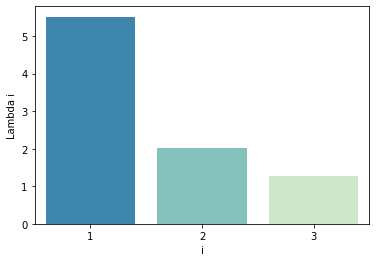

In [91]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i')

In [92]:
data_PCA = pd.DataFrame(p.transform(df4), columns=(['col1', 'col2', 'col3']))

In [93]:
data_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2205.0 -3.595008e-17  2.347944 -3.046312 -2.042979 -0.826627  1.799391   
col2  2205.0  1.913310e-17  1.424766 -3.344666 -1.146257  0.036286  0.837534   
col3  2205.0 -7.192533e-17  1.123635 -4.254812 -0.689362 -0.051687  0.645248   

           max  
col1  7.409852  
col2  3.884243  
col3  5.143032

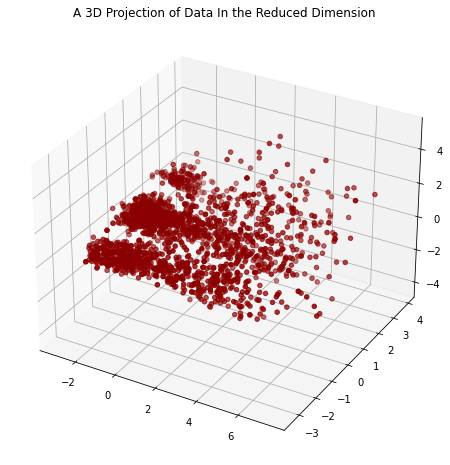

In [94]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

### Cluster Modeling

In [95]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn import metrics 

In [96]:
model = KMeans()
model.fit(data_PCA)

KMeans()

In [97]:
model.labels_

array([2, 5, 1, ..., 1, 0, 5])

In [98]:
cluster_range = range(2,21)
inertiarange = [] 
silhoueterange = []

for i in cluster_range:
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(data_PCA)
    inertiarange.append(kmeans.inertia_)
    silhoueterange.append(metrics.silhouette_score(data_PCA,kmeans.labels_))


In [99]:
print(list(cluster_range))
print(50*'*')
print(inertiarange)
print('*'*50)
print(silhoueterange)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
**************************************************
[9982.234819430432, 7883.453830202497, 6677.6231786220305, 5706.408478520765, 5061.500678787772, 4457.219555092495, 4027.434991264153, 3646.8697700272123, 3351.4295238394748, 3122.4753078989625, 2957.793919944982, 2803.9231725261925, 2635.232465228656, 2484.5004019748085, 2352.1716824360356, 2246.2880957961315, 2119.5841015513943, 2077.9827062325867, 1967.4292730353734]
**************************************************
[0.4495243579222114, 0.33459187106174376, 0.3236490860021732, 0.32367047666924803, 0.3096785753053573, 0.3276605074875456, 0.3209268461183727, 0.3304334910370522, 0.3188996067640044, 0.31925471529825433, 0.32272010408926843, 0.3194586573906119, 0.32197074725707925, 0.3212505065090513, 0.3348652926404012, 0.32636590371409147, 0.3308196178498552, 0.3175879494039606, 0.3250933437121509]


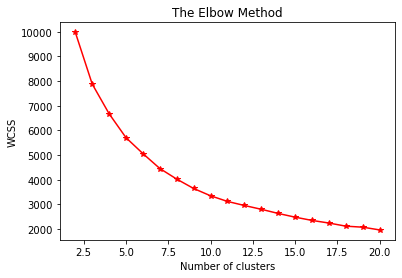

In [100]:
plt.plot(cluster_range, inertiarange,color = "red",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()   

 number of cluster shall be 4
The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the 
Agglomerative Clustering Model to get the final clusters.

In [101]:
# Perform KMeans clustering with k=2
kmeans = KMeans(n_clusters=3, random_state=0)
predictions = kmeans.fit_predict(data_PCA)
df3["Clusters"] = predictions

In [102]:
df3.head(3)

Age  Education  Marital_Status   Income  Expenses  cust_from  Cust_Age  \
0    2          1               0  58138.0      1617         11        66   
1    2          1               0  46344.0        27          9        69   
2    1          1               1  71613.0       776         10        58   

   Recency  Children  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0       58         0    635      88   546   172      88    88   
1       38         2     11       1     6     2       1     6   
2       26         0    426      49   127   111      21    42   

   TotalAcceptedCmp  Clusters  
0                 0         1  
1                 0         2  
2                 0         1

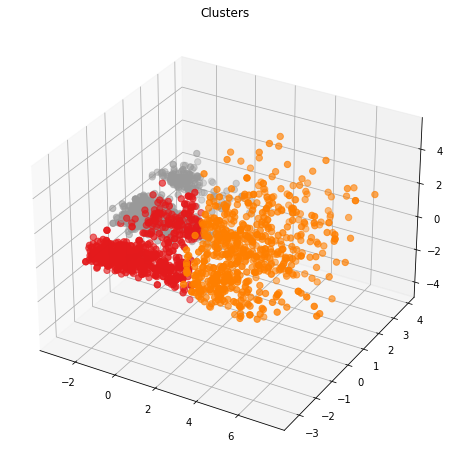

In [103]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=df3["Clusters"] , marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

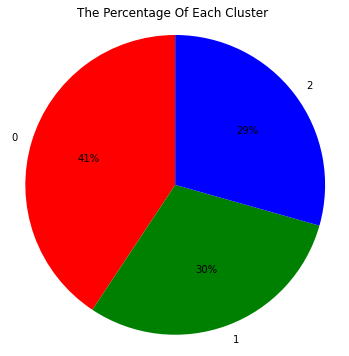

In [104]:
plt.figure(figsize = (6,6) )
plt.pie(list(df3["Clusters"] .value_counts()),labels=['0','1',"2"],
        autopct='%.00f%%' ,colors=['r', 'g', 'b','cyan'], startangle=90)
plt.title('The Percentage Of Each Cluster ' ,fontsize = 12)
plt.axis('equal')
plt.show()

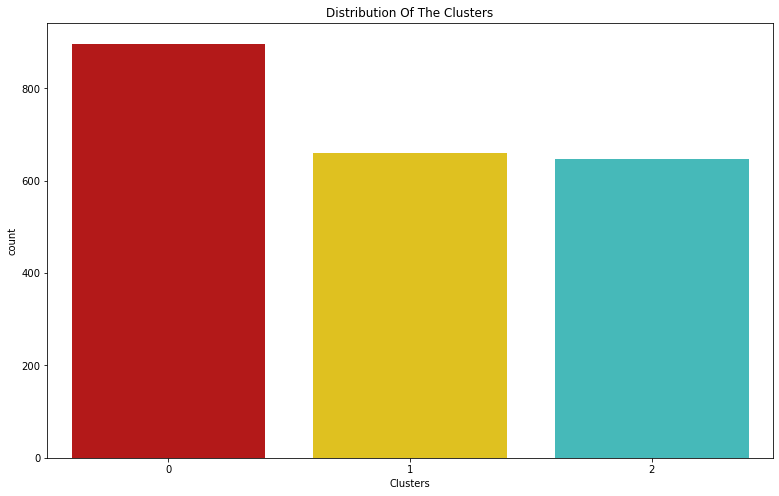

In [105]:
pal = [ '#cc0000','gold','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=df3["Clusters"] , palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

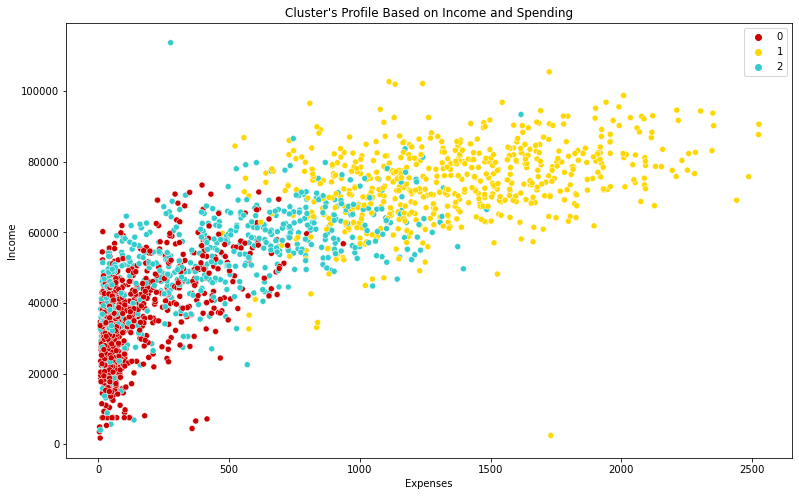

In [106]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=df3, x=df3['Expenses'], y=df3['Income'], hue=df3["Clusters"] , palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend()

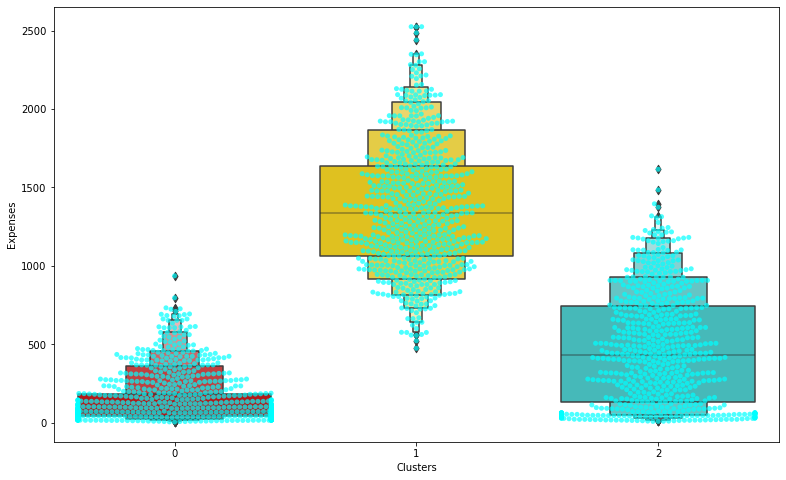

In [107]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=df3["Clusters"] , y=df3['Expenses'], color="cyan", alpha=0.7)
pl = sns.boxenplot(x=df3["Clusters"] , y=df3['Expenses'], palette=pal)
plt.show();

In [108]:
df5 = df3.copy(deep = True)

In [109]:
df5['Age'] = df5['Age'].map({0:'Adults',1:'Mature', 2:"Seniors"})

In [110]:
df5['Education'] = df5['Education'].map({0:"Undergraduate",1:"Graduate", 2:"Postgraduate"})

In [111]:
df5['Marital_Status'] = df5['Marital_Status'].map({0:"Alone",1:"relationship"})

In [112]:

px.histogram(df5, x=df5["TotalAcceptedCmp"],color=df5["Clusters"])

### Who the customer is ? 

In [113]:
#age
px.histogram(df5, x=df5["Age"],color=df5["Clusters"])

In [114]:
#Education
px.histogram(df5, x=df5["Education"],color=df5["Clusters"])

In [115]:
# from how long he is our our customer
px.histogram(df5, x=df5["cust_from"],color=df5["Clusters"])

In [119]:
# what is recency habit 
px.histogram(df5, x=df5["Recency"],color=df5["Clusters"])

### items on which customer is spending more

In [121]:
df5.head(2)

Age Education Marital_Status   Income  Expenses  cust_from  Cust_Age  \
0  Seniors  Graduate          Alone  58138.0      1617         11        66   
1  Seniors  Graduate          Alone  46344.0        27          9        69   

   Recency  Children  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0       58         0    635      88   546   172      88    88   
1       38         2     11       1     6     2       1     6   

   TotalAcceptedCmp  Clusters  
0                 0         1  
1                 0         2

<Figure size 432x288 with 0 Axes>

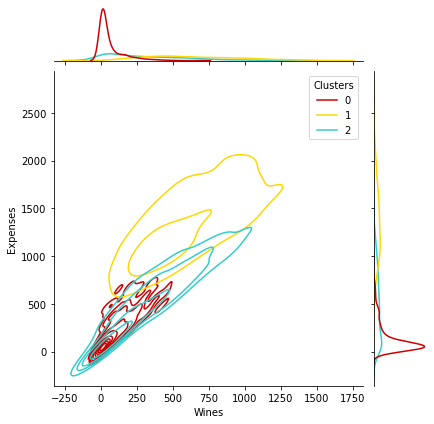

<Figure size 432x288 with 0 Axes>

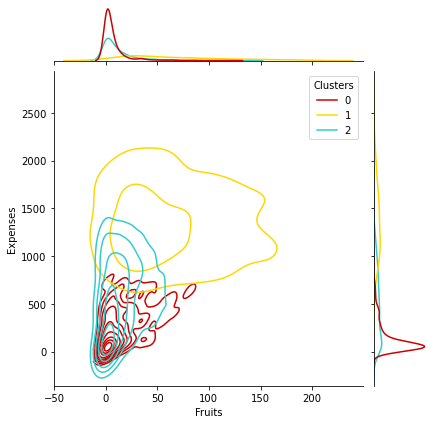

<Figure size 432x288 with 0 Axes>

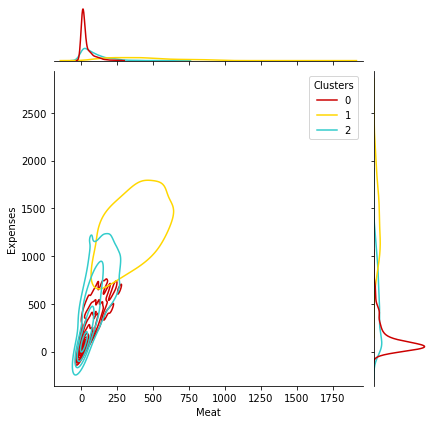

<Figure size 432x288 with 0 Axes>

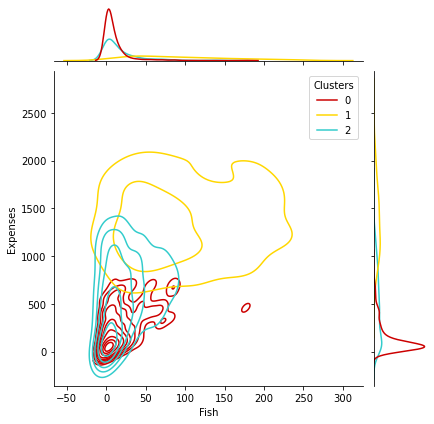

<Figure size 432x288 with 0 Axes>

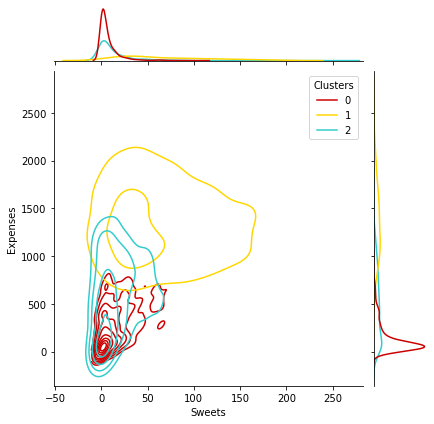

<Figure size 432x288 with 0 Axes>

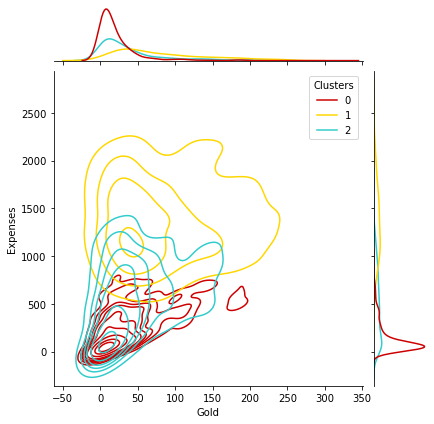

In [122]:
Personal = [ 'Wines','Fruits','Meat','Fish','Sweets','Gold']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df5[i], y=df5["Expenses"], hue =df5["Clusters"], kind="kde", palette=pal)
    plt.show()

### Conclusion

In [ ]:
Cluster 0
-- Income range is in between 5000 to 40000 and spending range is in between 0 to 500
-- Age range in between 25 to 50
-- From any educational level
-- Can be married and unmarried as well
-- Promotion acceptance is rare
-- Very few complete purchases using discounts

In [ ]:
--Cluster 1
-- Income range is in between 65000 to 85000 and spending range is in between 550 to 2000
-- Age range in between 30 to 60
-- Almost all have completed graduation
-- Most of them are married
-- Promotion acceptance ratio is 0.5

In [ ]:
-- Income range is in between 50000 to 80000 and spending range is in between 250 to 1800
---- Age range in between 35 to 60
-- Almost all have completed graduation
-- Most of them are married
-- All have children, most have one child
-- Promotion acceptance ratio is poor